News: NASA confirms water on the moon. 
Prediction: FAKE

News: Get rich fast with this one crypto trick! 
Prediction: FAKE

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

        REAL       0.93      0.90      0.91       639
        FAKE       0.90      0.93      0.92       628

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



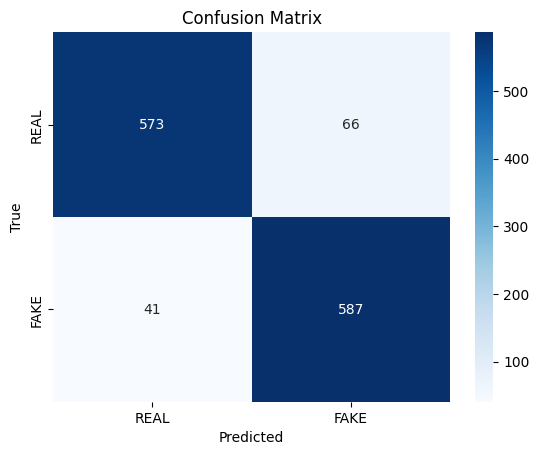

In [3]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('news.csv')

# Split data
X = data['text']
y = data['label'].apply(lambda x: 1 if x == 'FAKE' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline
model = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('classifier', LogisticRegression())
])

# Train model
model.fit(X_train, y_train)

# Sample prediction
sample_news = ["NASA confirms water on the moon.",
               "Get rich fast with this one crypto trick!"]
predictions = model.predict(sample_news)

# Print sample predictions
for text, label in zip(sample_news, predictions):
    print(f"News: {text} \nPrediction: {'FAKE' if label == 1 else 'REAL'}\n")

# Evaluate model - Accuracy
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Evaluate model - Classification Report
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['REAL', 'FAKE']))

# Evaluate model - Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
